## Transfer learning usingVGG Net

In [92]:
%matplotlib inline
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
import numpy as np
from keras.utils import np_utils
from keras import backend as K


K.set_image_dim_ordering('tf')

In [93]:
#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

model_vgg16_conv.trainable = False
#Create your own input format (here 3x200x200)

input = Input(shape=(32,32,3),name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
dropout = 0.5
x = Flatten(name='flatten',input_shape=(512,1,1))(output_vgg16_conv)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(dropout)(x)
x = Dense(512, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Then training with your data ! 

for layer in my_model.layers[:2]:
    layer.trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

/home/kriti/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("im...)`


## Preprocessing data

In [183]:
from PIL import Image
import os
import numpy as np
from os import listdir
from scipy.misc import imshow
import scipy.misc
from numpy import *
import PIL

size = 32
def preprocess_image(infilename,size):
    data = Image.open(infilename)#.convert('L')
#     data = scipy.misc.imread(infilename, mode = "L")
    data.thumbnail((size,size), Image.ANTIALIAS)
    img = data.resize((size,size))
    scipy.misc.imsave(infilename, img)
    
def load_image( infilename ) :
    data = scipy.misc.imread(infilename, mode = "RGB")
#     preprocess_image(infilename,size)
#     return 1
    return data
#Meme,greetings,scanned_docs,imp_img

path = ['Dataset/imgflip_images', 'Dataset/greetings_images','Dataset/scanned_documents','Dataset/train_val_imgs']
# path = ['Dataset/train_val_imgs']
Y = []
X = []
data = []

for p in path:
    for files in listdir(p):
#         print(files)
        try:
            t = load_image(p+'/'+files)
            X = t
            Y = (float(path.index(p)))
            data.append((X,Y,p+'/'+files))
        except:
            print("error reading file:"+ files)

In [184]:
#Xtemp = np.uint8(X)
import random
import matplotlib.pyplot as plt
seed = 7
np.random.seed(seed)
random.shuffle(data)

imageNameDict = {}
X = []
Y = []
p = data[3412]

for d in data:
  
    X.append(d[0])
    Y.append(d[1])
    imageNameDict[len(X)-1]=d[2]

(array([[[124, 128, 131],
        [125, 129, 130],
        [128, 129, 131],
        ..., 
        [130, 130, 132],
        [128, 128, 130],
        [126, 126, 128]],

       [[124, 128, 129],
        [125, 129, 130],
        [128, 129, 131],
        ..., 
        [132, 132, 134],
        [130, 130, 132],
        [128, 128, 130]],

       [[125, 126, 128],
        [127, 128, 130],
        [128, 129, 131],
        ..., 
        [134, 134, 136],
        [132, 132, 134],
        [130, 130, 132]],

       ..., 
       [[134, 133, 138],
        [134, 133, 138],
        [134, 134, 136],
        ..., 
        [143, 141, 142],
        [147, 145, 146],
        [137, 135, 136]],

       [[133, 132, 137],
        [133, 132, 137],
        [133, 133, 135],
        ..., 
        [138, 136, 137],
        [145, 143, 144],
        [135, 133, 134]],

       [[132, 131, 136],
        [132, 131, 136],
        [132, 132, 134],
        ..., 
        [134, 132, 133],
        [145, 143, 144],
        [140, 138

In [217]:
image_size = 32
# fix random seed for reproducibility
seed = 7
# np.random.seed(seed)
totalSize = len(X)
trainingSize = int(0.8*totalSize)
# load data
X_train = np.array(X[:trainingSize])
y_train = np.array(Y[:trainingSize])
X_test = np.array(X[trainingSize:])
y_test = np.array(Y[trainingSize:])

X_train = X_train / 255.0
X_test = X_test / 255.0

# reshape to be [samples][pixels][width][height]
# X_train = X_train.reshape(X_train.shape[0], 3, image_size, image_size).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 3, image_size, image_size).astype('float32')
# # normalize inputs from 0-255 to 0-1

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

0.0


## Sanity Check

In [195]:
print(X_train[0].shape)
print(len(X_train))

(32, 32, 3)
19660


## Fit the new model

In [196]:
from keras.callbacks import History 
history = History()

In [197]:
epochs = 8
weights_file = 'models/vgg_exp3.h5'
if not os.path.exists(weights_file):
#     my_model.compile(optimizer = 'adam',loss= 'categorical_crossentropy', metrics = ['accuracy'])
    my_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=200, callbacks = [history])    
    my_model.save_weights(weights_file)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
else:
    my_model.load_weights(weights_file)


In [198]:
classes_dict = {}
classes_dict[0] = 'Memes'
classes_dict[1] = 'Greetings'
classes_dict[2] = 'Scanned Documents'
classes_dict[3] = 'Miscellaneous'

## Plots

In [199]:
import matplotlib.pyplot as plt
def plot(label1,label2,xlabel,ylabel):
    X_axis = range(1,len(acc)+1)
    plt.plot(X_axis, acc, marker='o', linestyle='-', color='g',label=xlabel)
    plt.plot(X_axis, val_acc, marker='o', linestyle='--', color='r',label=ylabel)
    plt.xlabel(label1)
    plt.ylabel(label2)
    legend = plt.legend(loc='lower right', shadow=True)
    plt.show()

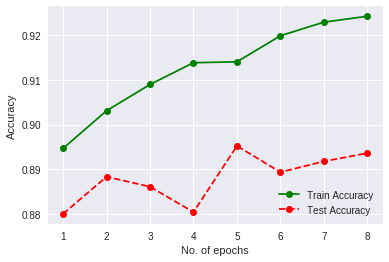

In [200]:
plot('No. of epochs','Accuracy',"Train Accuracy","Test Accuracy")

## Confusion Matrix

4915/4915 [==============================] - 81s    
[[ 684   31    1  109]
 [   9  951    3   56]
 [   0    1  455    2]
 [  37   40    0 2536]]


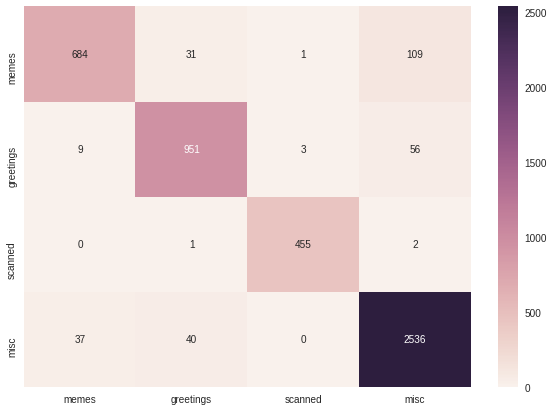

In [201]:
import numpy as np
predict = my_model.predict(X_test, verbose=1)
predict1 = np.argmax(predict,axis=1)
y_test1 = np.argmax(y_test,axis=1)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test1,predict1)
print(cm)
sn.set()
import matplotlib.pyplot as plt
%matplotlib inline
# plt.imshow(cm, cmap='binary')
pd.options.display.float_format = '{:.2f}'.format
categories = ["memes",'greetings','scanned','misc']
np.set_printoptions(suppress=True)
df_cm = pd.DataFrame(cm, index = [i for i in categories],
                  columns = [i for i in categories])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [204]:
misclassified = np.where(y_test1 != predict1)
# print((misclassified[0]))
# print(len(y_test1))

[  16   26   62   65   74   78  134  145  152  188  195  210  231  237  278
  364  373  390  394  423  448  455  457  494  534  535  536  566  574  595
  596  614  618  632  646  674  692  695  702  743  819  841  844  867  880
  895  920  926  946 1008 1014 1049 1071 1112 1166 1210 1219 1278 1281 1322
 1326 1356 1363 1387 1437 1459 1464 1488 1493 1506 1563 1569 1572 1594 1626
 1666 1671 1677 1705 1715 1717 1718 1766 1779 1780 1793 1816 1821 1823 1825
 1828 1843 1881 1910 1923 1931 1965 1978 2002 2039 2041 2044 2053 2064 2077
 2079 2088 2090 2101 2111 2113 2114 2116 2122 2142 2149 2156 2176 2204 2215
 2230 2238 2251 2289 2304 2338 2343 2358 2361 2362 2380 2400 2416 2426 2431
 2465 2471 2486 2491 2536 2539 2602 2607 2609 2635 2665 2672 2676 2679 2699
 2713 2714 2736 2748 2767 2776 2791 2794 2814 2857 2858 2888 2912 2977 2994
 2996 3010 3019 3028 3077 3086 3114 3118 3126 3128 3139 3152 3172 3181 3183
 3190 3222 3233 3266 3291 3300 3309 3320 3340 3396 3404 3405 3417 3452 3458
 3460 3461 3

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline  
misclassified_files = []
for i in misclassified[0]:
#     print("backup/"+imageNameDict[i+trainingSize])
    misclassified_files.append("backup/"+imageNameDict[i+trainingSize])

289
backup/Dataset/train_val_imgs/004215-01.JPG
Predicted Label:Greetings
Correct Label:Miscellaneous


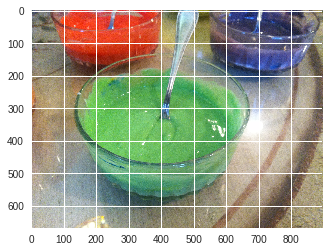

In [248]:
print(len(misclassified_files))
img_index = 22
img = Image.open(misclassified_files[img_index])
print(misclassified_files[img_index])
plt.imshow(img)
p_label = classes_dict[predict1[int(misclassified[0][img_index])]]
c_label = classes_dict[y_test1[int(misclassified[0][img_index])]]
print("Predicted Label:"+ p_label)
print("Correct Label:"+ c_label)